# YELP API 

For this assignment, I will start by downloading the data of restaurants in the Brickell Area from the Yelp API. API's are generally a good way to access 3rd party data, since they inform the data host that you have authenticated yourself for the use of their data. We are going to download the restaurants and their details from the Yelp API.

In [1]:
#importing libraries
import requests 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
#Define the API key, define the endpoint, define the header 
API_KEY = 'GxuSZq20NHph7uqSkyaoYu4SIqvl1YJsCfqeKJngbcudfhVyMbEySnD9aDvUtBqwulkcLAdmsB4qrI0BWZ00QPq9ZKdLBQ1KHgyy1Dlj8hfTA_Kb8yVMmgJYLuTiXXYx'
ENDPOINT = 'https://api.yelp.com/v3/businesses/search'
HEADERS = {'Authorization' : 'bearer %s' % API_KEY } 

API is an acronym that stands for application programming interface. API’s provide a standardized way for two applications to talk to each other. In this case, the applications communicating with each other are the server application where World Bank stores data and your Jupyter notebook.

Before there were APIs, there was web scraping. People would download html directly from a website and then parse the results programatically. This practice is in a legal grey area. One reason that APIs became popular was so that companies could provide data to users and discourage web scraping.

In general, you access APIs via the web using a web address. Within the web address, you specify the data that you want. To know how to format the web address, you need to read an API's documentation. Some APIs also require that you send login credentials as part of your request. The World Bank APIs are public and do not require login credentials.

The Python requests library makes working with APIs relatively simple.

In [3]:
#Define the parameters of the query
PARAMETER = {'term':'restaurants',
              'limit' : 50, 
              'radius' : 2000,
             #'offset':50,
              'location' : '50 SW 12th St, Miami, FL 33130'}
#make a request to the yelp API 
response = requests.get(url = ENDPOINT, params = PARAMETER, headers = HEADERS)

#convert the json string to a dictionary 
business_data = response.json()

#printing the keys in the dictionary
print(business_data.keys())

dict_keys(['businesses', 'total', 'region'])


I decide to print the 3 main keys to see what I am dealing with here. 'Total' and 'regiion' are pretty much self-explantory. I open the business key value and I notice that each entry is one large dict value with the column as the key and the value as the value pair

In [4]:
#access induvidual attributes of the business
for biz in business_data['businesses']:
    print(biz)

{'id': 'ix8ifP1jQM9ektdVAs19sQ', 'alias': 'crazy-about-you-miami-3', 'name': 'Crazy About You', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/YYPRTEaq2U9EoWC9IsirFA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=TLtUxGloO6F2j41xBlbmGw', 'review_count': 1510, 'categories': [{'alias': 'mediterranean', 'title': 'Mediterranean'}, {'alias': 'italian', 'title': 'Italian'}, {'alias': 'spanish', 'title': 'Spanish'}], 'rating': 4.0, 'coordinates': {'latitude': 25.7620078715623, 'longitude': -80.1889463275432}, 'transactions': ['delivery', 'restaurant_reservation', 'pickup'], 'price': '$$', 'location': {'address1': '1155 Brickell Bay Dr', 'address2': 'Ste 101', 'address3': '', 'city': 'Miami', 'zip_code': '33131', 'country': 'US', 'state': 'FL', 'display_address': ['1155 Brickell Bay Dr', 'Ste 101', 'Miami, FL 33131']}, 'phone': '+13053774442'

In [5]:
#accessing the business key that has restuarant's details
business_data['businesses']

[{'id': 'ix8ifP1jQM9ektdVAs19sQ',
  'alias': 'crazy-about-you-miami-3',
  'name': 'Crazy About You',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/YYPRTEaq2U9EoWC9IsirFA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=TLtUxGloO6F2j41xBlbmGw',
  'review_count': 1510,
  'categories': [{'alias': 'mediterranean', 'title': 'Mediterranean'},
   {'alias': 'italian', 'title': 'Italian'},
   {'alias': 'spanish', 'title': 'Spanish'}],
  'rating': 4.0,
  'coordinates': {'latitude': 25.7620078715623,
   'longitude': -80.1889463275432},
  'transactions': ['delivery', 'restaurant_reservation', 'pickup'],
  'price': '$$',
  'location': {'address1': '1155 Brickell Bay Dr',
   'address2': 'Ste 101',
   'address3': '',
   'city': 'Miami',
   'zip_code': '33131',
   'country': 'US',
   'state': 'FL',
   'display_address': ['1155 Brickell Bay Dr', 

Notice that the json response is a list with two entries. 

That first entry is meta data about the results. For example, it says that there is one page returned with 232 results. 

The second entry is another list containing the data. This data would need some cleaning to be used in a pandas data frame. That would happen later in the transformation step of an ETL pipeline. Run the cell below to read the results into a dataframe and see what happens.

So from above cell, we can see that the data that we are interested in is stored in a dict called business_data, that can be accessed by a key called 'business'. In the next steps, we are going to convert this into a form that is more suitable for Exploratory Analysis by first converting it into a DataFrame and addressing challenges that we face from then on.

In [6]:
#converting business_data['businesses'] to a DataFrame
df1 = pd.DataFrame.from_dict(business_data['businesses'],orient = 'columns')
df1.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,crazy-about-you-miami-3,"[{'alias': 'mediterranean', 'title': 'Mediterr...","{'latitude': 25.7620078715623, 'longitude': -8...",(305) 377-4442,542.307321,ix8ifP1jQM9ektdVAs19sQ,https://s3-media3.fl.yelpcdn.com/bphoto/YYPRTE...,False,"{'address1': '1155 Brickell Bay Dr', 'address2...",Crazy About You,+13053774442,$$,4.0,1510,"[delivery, restaurant_reservation, pickup]",https://www.yelp.com/biz/crazy-about-you-miami...
1,honey-uninhibited-miami,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 25.76009, 'longitude': -80.20047}",(786) 391-1090,641.038091,-b4dNNCCsDMtidBcGtlM7g,https://s3-media2.fl.yelpcdn.com/bphoto/vuxRt4...,False,"{'address1': '1777 SW 3rd Ave', 'address2': No...",Honey Uninhibited,+17863911090,$$,4.5,212,[],https://www.yelp.com/biz/honey-uninhibited-mia...
2,boss-cow-miami-2,"[{'alias': 'brasseries', 'title': 'Brasseries'...","{'latitude': 25.76377, 'longitude': -80.19345}",(786) 218-9698,200.794196,Bt19UToGQNKJHKuWzGVPbA,https://s3-media4.fl.yelpcdn.com/bphoto/5Mp1uy...,False,"{'address1': '1036 S Miami Ave', 'address2': N...",BOSS COW,+17862189698,NaN,5.0,21,[],https://www.yelp.com/biz/boss-cow-miami-2?adju...
3,cvi-che-105-miami,"[{'alias': 'peruvian', 'title': 'Peruvian'}, {...","{'latitude': 25.775383, 'longitude': -80.1884004}",(305) 577-3454,1586.171706,1h8-r9cLeXxW99HhlRUnlA,https://s3-media3.fl.yelpcdn.com/bphoto/ygUI2y...,False,"{'address1': '105 NE 3rd Ave', 'address2': '',...",CVI.CHE 105,+13055773454,$$,4.5,3512,[],https://www.yelp.com/biz/cvi-che-105-miami?adj...
4,batch-gastropub-miami-miami,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...","{'latitude': 25.7624962180853, 'longitude': -8...",(305) 808-5555,52.039867,d1-i5ZPBfHagwQW5uvBLSg,https://s3-media4.fl.yelpcdn.com/bphoto/6UPqM2...,False,"{'address1': '30 SW 12th St', 'address2': None...",Batch Gastropub - Miami,+13058085555,$$,4.0,1051,"[pickup, delivery]",https://www.yelp.com/biz/batch-gastropub-miami...


Now that we have the data in a DataFrame format, we can see that there are some changes that need to be made to make it more easier to read. Firstly, we can remove the phone column since it has the same information as 'display_phone'.
We are also going to rename 'id','display_phone' and 'rating' column. Finally, we are going to rearrange the columns, so that the information we are most interested in when understanding the restaurant industry in brickell is available in the first few columns

In [7]:
#Rearranging the data
df1 = df1.drop(columns = ['phone'])
df1 = df1.rename(columns = {'display_phone':'phone','id':'restaurant_id','rating':'avg_rating'})
df = df1[['name','categories','price','avg_rating','review_count','restaurant_id','url','phone','coordinates','transactions']]
df1.head()

,alias,categories,coordinates,phone,distance,restaurant_id,image_url,is_closed,location,name,price,avg_rating,review_count,transactions,url
0,crazy-about-you-miami-3,"[{'alias': 'mediterranean', 'title': 'Mediterr...","{'latitude': 25.7620078715623, 'longitude': -8...",(305) 377-4442,542.307321,ix8ifP1jQM9ektdVAs19sQ,https://s3-media3.fl.yelpcdn.com/bphoto/YYPRTE...,False,"{'address1': '1155 Brickell Bay Dr', 'address2...",Crazy About You,$$,4.0,1510,"[delivery, restaurant_reservation, pickup]",https://www.yelp.com/biz/crazy-about-you-miami...
1,honey-uninhibited-miami,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 25.76009, 'longitude': -80.20047}",(786) 391-1090,641.038091,-b4dNNCCsDMtidBcGtlM7g,https://s3-media2.fl.yelpcdn.com/bphoto/vuxRt4...,False,"{'address1': '1777 SW 3rd Ave', 'address2': No...",Honey Uninhibited,$$,4.5,212,[],https://www.yelp.com/biz/honey-uninhibited-mia...
2,boss-cow-miami-2,"[{'alias': 'brasseries', 'title': 'Brasseries'...","{'latitude': 25.76377, 'longitude': -80.19345}",(786) 218-9698,200.794196,Bt19UToGQNKJHKuWzGVPbA,https://s3-media4.fl.yelpcdn.com/bphoto/5Mp1uy...,False,"{'address1': '1036 S Miami Ave', 'address2': N...",BOSS COW,NaN,5.0,21,[],https://www.yelp.com/biz/boss-cow-miami-2?adju...
3,cvi-che-105-miami,"[{'alias': 'peruvian', 'title': 'Peruvian'}, {...","{'latitude': 25.775383, 'longitude': -80.1884004}",(305) 577-3454,1586.171706,1h8-r9cLeXxW99HhlRUnlA,https://s3-media3.fl.yelpcdn.com/bphoto/ygUI2y...,False,"{'address1': '105 NE 3rd Ave', 'address2': '',...",CVI.CHE 105,$$,4.5,3512,[],https://www.yelp.com/biz/cvi-che-105-miami?adj...
4,batch-gastropub-miami-miami,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...","{'latitude': 25.7624962180853, 'longitude': -8...",(305) 808-5555,52.039867,d1-i5ZPBfHagwQW5uvBLSg,https://s3-media4.fl.yelpcdn.com/bphoto/6UPqM2...,False,"{'address1': '30 SW 12th St', 'address2': None...",Batch Gastropub - Miami,$$,4.0,1051,"[pickup, delivery]",https://www.yelp.com/biz/batch-gastropub-miami...


Going back to the original to create an analysis of the restaurants that REEF should partner with. I thought, on what grounds should we partner with these restaurants? 

I saw that REEF has had 71% personnel growth in 6 months and 221% in 12 months, so this means that REEF is looking to scale up fast and efficiently. We need to target restaurants that are established (we are not trying to change the profitbailtiy at present, since we are trying to establish a name), so we need to target resutarnats that are popular, so people can associate the higher end or popular restaruants with REEF and with halo effect they believe that REEF Kitchens is an established and respected startup. 

To find which restaurants are popular, lets have a look at the average raitngs.

From the above data, we can see that we have an average rating. Let's look at distribution of average rating to see if the review data that we have can be used in analysis.

In [8]:
#looking at the descriptive statistics of df1['avg_rating']
df1['avg_rating'].describe()

count    50.000000
mean      4.150000
std       0.419548
min       3.000000
25%       4.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: avg_rating, dtype: float64

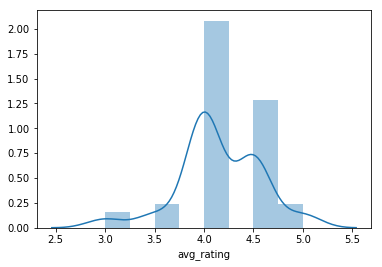

In [9]:
#Creating a distribution plot 
sns.distplot(df1['avg_rating'])

From the above data, we notice that the mena of the ratings are 4.15 and the 25% and 75% is between 4 and 4.5. This doesnt tell us alot about the restaurants and the customer sentiment towards it. 

To have a better understanding about which restaurants do consumers favor towards, it is advised to utilize a method to analyse or quantitatively measure customer centiment using Natural Language Processing. 

The next step in our analysis is to obtain these reviews. We are going to do this by conducting an API request to 'Reviews', by first creating a new DataFrame that contains 'name' and 'restaurant_id' columns from the  df1 dataframe. 

We will then add the reviews to the business_id dataframe. 

In [10]:
#To get the reviews of the business 
business_id = df1[['name','url','restaurant_id',]]

Now that we have gathered the data needed to access the review, we are going to first verify the url addresses of the restaurants and then use a Yelp API Request to get the data for the reviews.

In [11]:
#verifying if the URLS in the dataframe are functioning websites.
from urllib.request import urlopen
from bs4 import BeautifulSoup

for i in business_id['url']:
    try:
        html = urlopen(i)
    except HTTPError as e:
        print(e)
        #return null, break, or do some other "Plan B"
    else:
        bsObj = BeautifulSoup(html.read());
        print("Sucessfully Accessed {}".format(bsObj.title.text))


Sucessfully Accessed Crazy About You - 2019 All You Need to Know BEFORE You Go (with Photos) Mediterranean - Yelp
Sucessfully Accessed Honey Uninhibited - 2019 All You Need to Know BEFORE You Go (with Photos) Breakfast & Brunch - Yelp
Sucessfully Accessed BOSS COW - 2019 All You Need to Know BEFORE You Go (with Photos) Brasseries - Yelp
Sucessfully Accessed CVI.CHE 105 - 2019 All You Need to Know BEFORE You Go (with Photos) Peruvian - Yelp
Sucessfully Accessed Batch Gastropub - Miami - 2019 All You Need to Know BEFORE You Go (with Photos) Gastropubs - Yelp
Sucessfully Accessed Gyu-Kaku Japanese BBQ - 2019 All You Need to Know BEFORE You Go (with Photos) Japanese - Yelp
Sucessfully Accessed Dolores But You Can Call Me Lolita - 2019 All You Need to Know BEFORE You Go (with Photos) American (New) - Yelp
Sucessfully Accessed Zuuk Mediterranean Kitchen - 2019 All You Need to Know BEFORE You Go (with Photos) Mediterranean - Yelp
Sucessfully Accessed The Wharf Miami - 2019 All You Need to Kno

In [12]:
#running a for loop in over the list of business ID we got from our search to return the reviews
business_review = {}

for i in business_id['restaurant_id']: 
    ENDPOINT = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(i)
    response = requests.get(url = ENDPOINT, params = PARAMETER, headers = HEADERS)
    review = response.json()
    business_review.update({i:review['reviews'][2]})
    print(business_review)
    

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}}
{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

{'ix8ifP1jQM9ektdVAs19sQ': {'id': 'Wcd0fmWcfFtrAzS9ca3XIg', 'url': 'https://www.yelp.com/biz/crazy-about-you-miami-3?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=Wcd0fmWcfFtrAzS9ca3XIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2j41xBlbmGw', 'text': "This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't...", 'rating': 4, 'time_created': '2019-11-05 08:11:35', 'user': {'id': 'wI_QVE2fvtc65T6JPg8syg', 'profile_url': 'https://www.yelp.com/user_details?userid=wI_QVE2fvtc65T6JPg8syg', 'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/jcW_2Lo3LBwh82EO5xxiCw/o.jpg', 'name': 'Schuyler K.'}}, '-b4dNNCCsDMtidBcGtlM7g': {'id': 'mx_ZMlkAJEvvOfqXCGE3eg', 'url': 'https://www.yelp.com/biz/honey-uninhibited-miami?adjust_creative=TLtUxGloO6F2j41xBlbmGw&hrid=mx_ZMlkAJEvvOfqXCGE3eg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=TLtUxGloO6F2

From the the Yelp Review API request, we received the review data of the restaurants that is indexed by their restuarant id. We will then use the restaurant id from the df DataFrame and then extract the restaurant name to its review. 

In [13]:
#accessing review based on the restaurant id
business_review['ix8ifP1jQM9ektdVAs19sQ']['text']

"This is a really cute place to go on a date or dine with a group of friends. It is a classy but relaxed environment. I wanted to eat outside, but it wasn't..."

Unfortunately, after scraping our reviews, we notice that while we had the option of choosing between 3 reviews. The reviews are a small extract of 30 characters. For this we will scrape the reviews directly from the Yelp Website later.

In [14]:
print(business_review.keys())

dict_keys(['ix8ifP1jQM9ektdVAs19sQ', '-b4dNNCCsDMtidBcGtlM7g', 'Bt19UToGQNKJHKuWzGVPbA', '1h8-r9cLeXxW99HhlRUnlA', 'd1-i5ZPBfHagwQW5uvBLSg', 'wUgicT0LJbrHnav4d8SwSA', 'aIQK1sw9Prr-KdUu717vRw', 'WuTpipAE9UMkU7_Io52KxQ', 'lmmFNizrRMyZal3dUQP34g', 'UFhaHpDSPtheFDUyu2yIHw', 'BlZqSfhGYf4gdQlMkKXU4A', 'g7BAGJUrHesJYBH9g7Y3WQ', 'tbTF0gAwCAdI1aiX0pNvEQ', 'eH2CoBLxUvusMfKg7qMQKQ', 'kejTnmp4kXxgCrGP3igIFg', 'anAxMJXChsZ-f546JeZjfQ', 'JfAmB5IR3UTF0GVOoW2pVQ', 'tNUg9mLG871y5lM1mMn6kw', 'DnwJ-nnURQCiQEXeT-9hNQ', 'n6xaLebNjh8sYiYh89gdEQ', 'PfTxA6qVXrME9UxHA1Ye_Q', 'Y6E0G3ATW4597V4jl1uxyA', '4utRX5zunli5B3HZT2-blw', 'wTGfOdzATz-Nb_RB5H3Ctw', 'Ifzu7FxLMyeMFdx2xwF7GQ', 'ys97r_tdXZy1o8lwx3jl3A', 'DNCAEx19cpntKp1yQRAT7g', 'Tc4YtiYW5z8UcBT8xWsBkQ', 'yxY54abJsKiBWvGSEgekmA', 'yQjAJfAe4sCtvFmRnOJoDw', 'Nq1wrxiDc9T4M4QMbAIweQ', 'Qzk4ux58Aw58IzAmXewEGA', 'B2-pidnIEJcI4-sy97BJww', 'yArWW2hpGmq8wq3nvC_f4A', 'hZZF4DekkQmi2s4sOETpXg', 'arvsiHTcyJzge4wxmQiaXw', 'e1XkApaJG7aqx6HUntEzIw', '8_cuODO8G0yuzQO_fRW5kA', '

In [15]:
#converting the reviews in a dataframe
df1_review = pd.DataFrame.from_dict(business_review, orient = 'index')

#resetting the index and adding a name column
df1_review.reset_index(level=0,inplace = True)
df1_review["name"] = ''


In [16]:
#Transform the restaurant id to restaurant name
for i in range(0,len(business_id['restaurant_id'])):
    for j in range(0,len(df1_review)):
        if business_id['restaurant_id'][i] == df1_review['index'].iloc[j]: 
            df1_review['name'][j] = business_id['name'][i]
    

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
df1_review = df1_review[['name','rating','text','id','url']]
df1_review = df1_review.rename(columns = {'id':'review_id'})

Now that we extracted the latest review from the Yelp API, we are going to add it to the original DataFrame. 

In [18]:
#merging the two DataFrames on name
df = pd.merge(df1,df1_review, on ='name')

In [19]:
df = df.rename(columns = {'rating':'latest_rating','distance':'distance (metres from centre)','transactions':'services','url_x':'url'})
#rearranging the columns 
df = df[['name','categories','price','avg_rating','review_count','latest_rating','services','text','phone','url','review_id','location','distance (metres from centre)','coordinates','restaurant_id']]
df.head()

,name,categories,price,avg_rating,review_count,latest_rating,services,text,phone,url,review_id,location,distance (metres from centre),coordinates,restaurant_id
0,Crazy About You,"[{'alias': 'mediterranean', 'title': 'Mediterr...",$$,4.0,1510,4,"[delivery, restaurant_reservation, pickup]",This is a really cute place to go on a date or...,(305) 377-4442,https://www.yelp.com/biz/crazy-about-you-miami...,Wcd0fmWcfFtrAzS9ca3XIg,"{'address1': '1155 Brickell Bay Dr', 'address2...",542.307321,"{'latitude': 25.7620078715623, 'longitude': -8...",ix8ifP1jQM9ektdVAs19sQ
1,Honey Uninhibited,"[{'alias': 'breakfast_brunch', 'title': 'Break...",$$,4.5,212,2,[],"Although the taste of the food was good, here ...",(786) 391-1090,https://www.yelp.com/biz/honey-uninhibited-mia...,mx_ZMlkAJEvvOfqXCGE3eg,"{'address1': '1777 SW 3rd Ave', 'address2': No...",641.038091,"{'latitude': 25.76009, 'longitude': -80.20047}",-b4dNNCCsDMtidBcGtlM7g
2,BOSS COW,"[{'alias': 'brasseries', 'title': 'Brasseries'...",NaN,5.0,21,5,[],I really liked this limited menu but excellent...,(786) 218-9698,https://www.yelp.com/biz/boss-cow-miami-2?adju...,pxVfsnT33U1QNm14iZu2oQ,"{'address1': '1036 S Miami Ave', 'address2': N...",200.794196,"{'latitude': 25.76377, 'longitude': -80.19345}",Bt19UToGQNKJHKuWzGVPbA
3,CVI.CHE 105,"[{'alias': 'peruvian', 'title': 'Peruvian'}, {...",$$,4.5,3512,5,[],"My friend took me for dinner to Cviche 105, it...",(305) 577-3454,https://www.yelp.com/biz/cvi-che-105-miami?adj...,YFPNNfqsTceq_iycHmM8-g,"{'address1': '105 NE 3rd Ave', 'address2': '',...",1586.171706,"{'latitude': 25.775383, 'longitude': -80.1884004}",1h8-r9cLeXxW99HhlRUnlA
4,Batch Gastropub - Miami,"[{'alias': 'gastropubs', 'title': 'Gastropubs'...",$$,4.0,1051,5,"[pickup, delivery]",Awesome place for brunch! I went with some fri...,(305) 808-5555,https://www.yelp.com/biz/batch-gastropub-miami...,y6Dw_ZkqgWZvFMnYnWlf2A,"{'address1': '30 SW 12th St', 'address2': None...",52.039867,"{'latitude': 25.7624962180853, 'longitude': -8...",d1-i5ZPBfHagwQW5uvBLSg


In [20]:
#converting the the '$' format in df['price'] to a numerical scale from 1-4
df['price'] = df['price'].map({'$':1,'$$':2,'$$$':3,'$$$$':4})

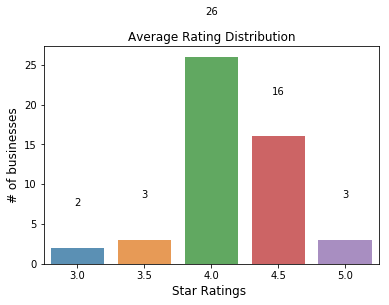

In [21]:
#Get the distribution of the ratings
x=df['avg_rating'].value_counts()
x=x.sort_index()
#plot
plt.figure
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Average Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    


plt.show()

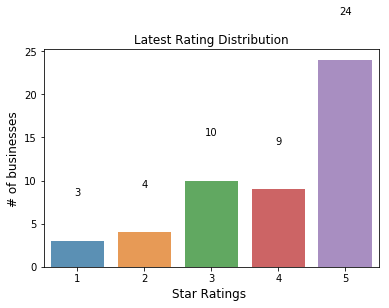

In [22]:
#Get the latest rating distribution of the rating
x=df['latest_rating'].value_counts()
x=x.sort_index()
#plot
plt.figure
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Latest Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In the next part, we are going to analyse the reviews of the Restaurants submitted on their Yelp pages. This will be done by scraping the reviews of the website and then implementing sentiment analysis on the dataset. 